In [14]:
import pandas as pd 
import seaborn as sns #for statistical visualization
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans #algorithm to make clusters
import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv("/Users/pernebayarailym/Documents/Portfolio Projects AP/Python Projects/Project_15_Customer_Segmentation_Clustering/Mall_Customers.csv")

In [16]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Univeriate Analysis

In [17]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


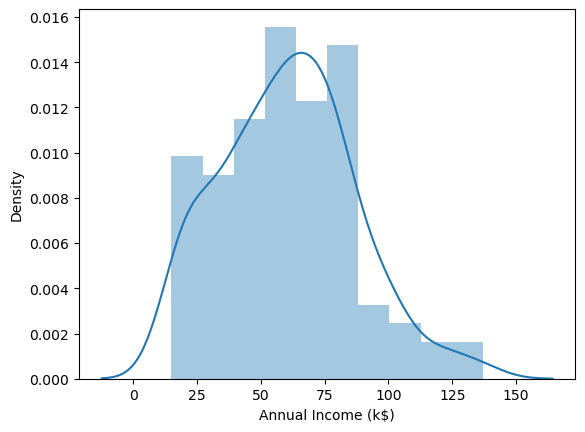

In [18]:
sns.distplot(df['Annual Income (k$)']);

In [19]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

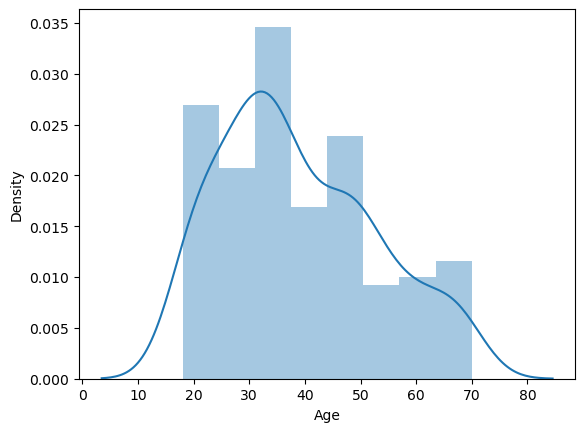

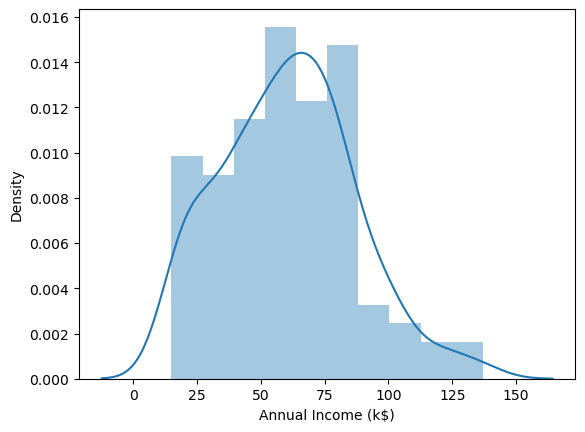

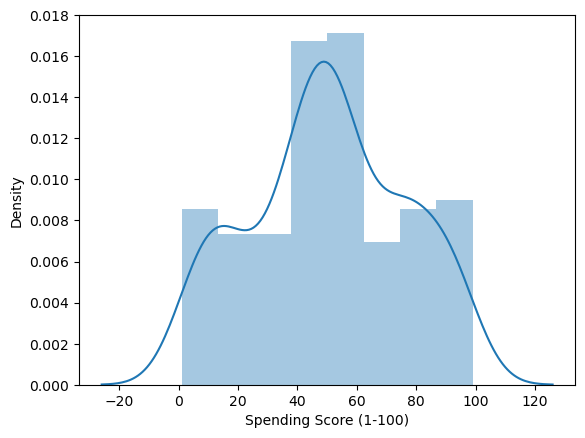

In [22]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i]);

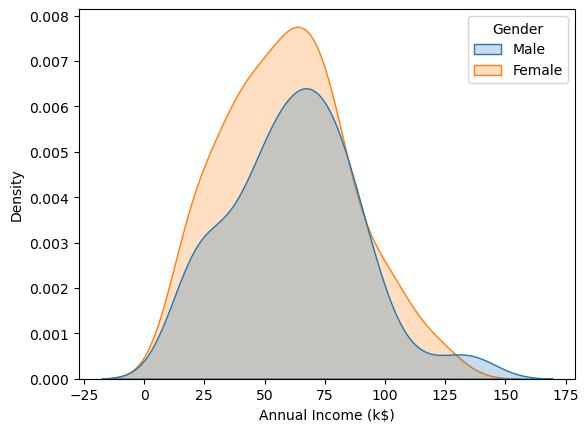

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df has columns 'Annual Income (k$)' and 'Gender'

sns.kdeplot(data=df, x='Annual Income (k$)', shade=True, hue='Gender')
plt.show()


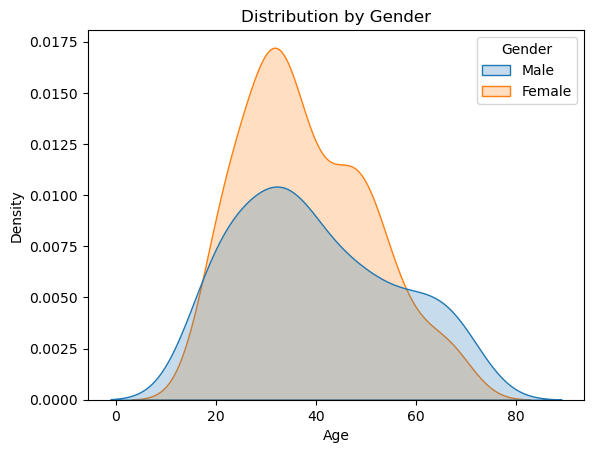

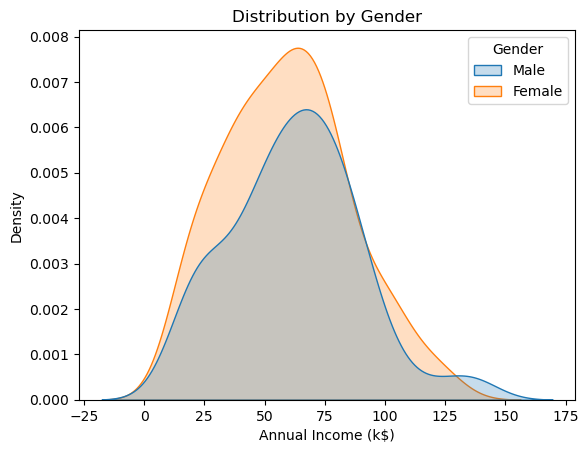

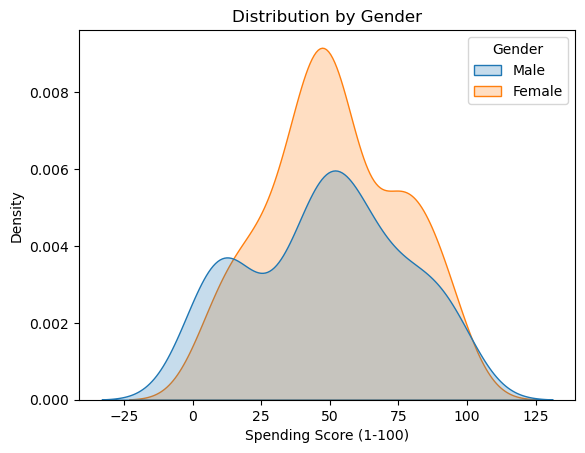

In [42]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(data=df, x=i, shade=True, hue='Gender')
    plt.title(f'Distribution by Gender')
    plt.show()

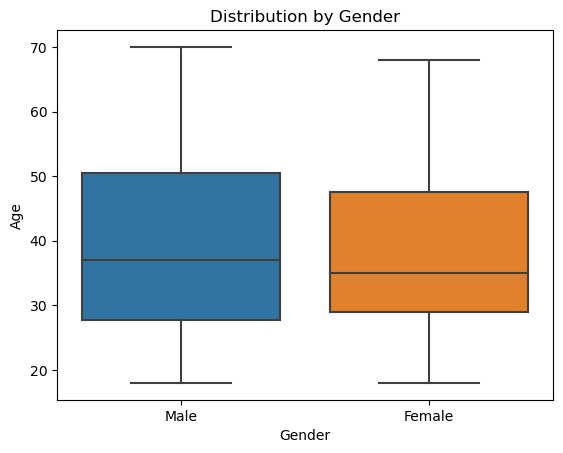

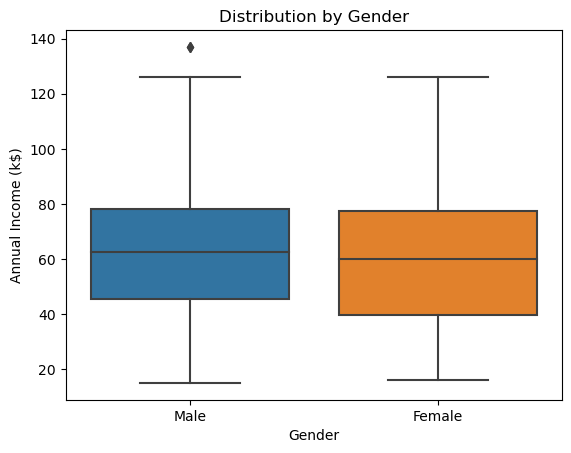

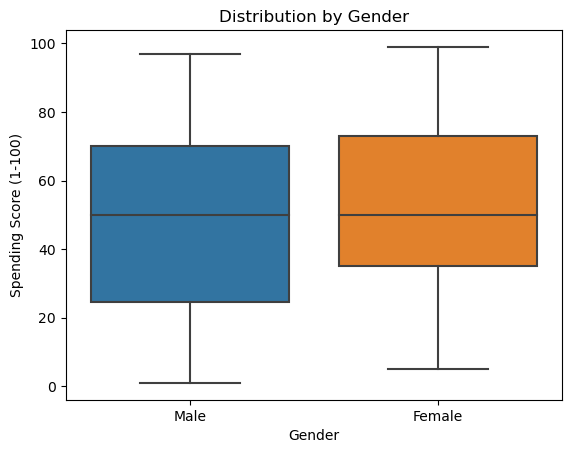

In [43]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df, x='Gender', y=df[i])
    plt.title(f'Distribution by Gender')
    plt.show()

In [45]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

## Bivariate Analysis

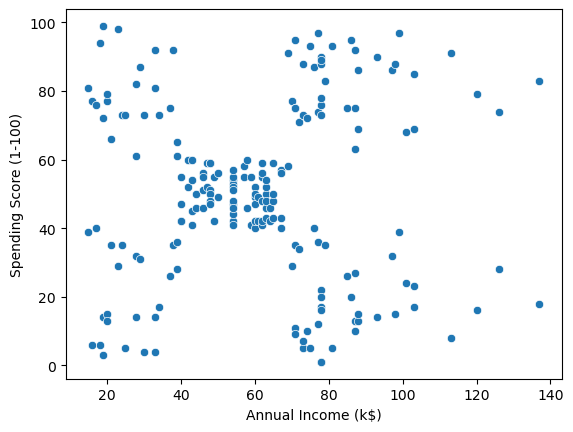

In [50]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.show()